#  Toyama Bay Long-Term Observations Data Analysis 

## Purpose
Describe the spatio-temporal variability of CTD profiles and identify the factors controlling near-coastal waters salinity and phytoplankton

## Methodology
Analysis are based on
1. ctd_profile_reading.ipynb prepares the input data
2. Prepared data is loaded and transformed into a 2D array of individual state variables
3. Prepare the Pandas DataFrame
4. Analyse the seasonal and long-term variability of salinity, temperature and density in the 9-coastal stations
5. Analyse the above variables relation with (bottle samples) nutrients (phosphate & nitrate) and chlorophyll-a

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
from datetime import datetime
import string
import subprocess
from scipy import stats
from pathlib import Path

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# The following is specific Jupyter notebooks
%matplotlib inline
# %config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
import valutils as util

In [3]:
util.custom_plt(plt=plt)

# Parameter definition
We set all relevant parameters for our notebook. 

By convention, parameters are uppercase, while all the other variables follow Python's guidelines.

In [4]:
PATH = Path(r'C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT')


# Data import
We retrieve all the required data for the analysis.

# Data processing & Vis

In [5]:
def get_plot(df, sen: str, mk: str, xvar: str
             , w: int = 3, h: int = 2, lw: int = 1):

    fig, ax = plt.subplots(figsize=(w, h), constrained_layout=True)
    xx, yy = [], []
    
    idx = df.loc[:, xvar].isnull()
    dfi = df.loc[~idx, :]
    dfi.rename(columns={xvar: 'x', var_select: 'y'}, inplace=True)
    
    dfi['x'] = np.asarray([float(v) for v in dfi.loc[:, 'x'].to_numpy()])
    dfi['y'] = np.asarray([float(v) for v in dfi.loc[:, 'y'].to_numpy()])
    
    x = dfi.loc[:, ['x', 'Year', 'Filename']]
    y = dfi.loc[:, 'y']
    
    racio = [1, 2] # if mk == 'China' else [,2,3]
    # print(dfi)
    ax = util.get_scatter(xdata=x
                         , ydata=y
                         , ax=ax
                         , ratio=racio
                         , color=markers[mk]['c']
                         , alpha=markers[mk]['a']
                         , fill=markers[mk]['f']
                         , marker=markers[mk]['m']
                         , label=mk
                         , lw=lw
                         , sen=sen)

    # print(np.log10(dfi.loc[:, 'chla'].to_numpy()))
    # print(x, y) if mk == 'China' else ''
    x = dfi['x'].values
    y = dfi['y'].values
    
    mask = np.isnan(x) | np.isnan(y)
    xx.extend(np.log10(x[~mask]).tolist())
    yy.extend(np.log10(y[~mask]).tolist())
    return np.asarray(xx), np.asarray(yy), ax

In [6]:
sens = {'MODISA': 'MODIS/Aqua', 
        'VIIRSN': 'VIIRS/SNPP', 
        'SGLI': 'SGLI/GCOM-C',
        'GOCI': 'GOCI/COMS'}

markers = {'China': {'m': 'o', 'c': 'k', 'a': 1, 'f': 'w'}, 
           'Korea': {'m': 'o', 'c': 'b', 'a': 0.8, 'f': 'b'},
           'Japan': {'m': 'o', 'c': 'k', 'a': 0.5, 'f': 'k'},
           'Russia': {'m': 'o', 'c': 'g', 'a': 0.5, 'f': 'g'}}

index = ['Date', 'Time', 'Lat', 'Lon', 'station']
field = 'Variable [Units]' # the field where we extract the satellite variable of interest
# the name of the satellite variable of interest
var_select = 'Median'

MODISA
	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\china_dataset.2022-03-12T15-36-12-662099.MODISA.OC.matchup.csv
	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\korea_dataset.2022-03-12T21-31-01-736805.MODISA.OC.matchup.csv
	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\japan_dataset.2022-03-12T21-44-49-941562.MODISA.OC.matchup.csv

japan_dataset.2022-03-12T21-44-49-941562.MODISA.OC.matchup.csv: chlor_a [mg m^-3]
(939, 6)
MODIS_Aqua_2010_over.csv

MODIS_Aqua_2011_under.csv

MODIS_Aqua_2012_under.csv

MODIS_Aqua_2014_over.csv

MODIS_Aqua_2014_under.csv

MODIS_Aqua_2015_under.csv

MODIS_Aqua_2016_under.csv

MODIS_Aqua_2017_under.csv

	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\russia_dataset.2022-03-12T15-47-52-529135.MODISA.OC.matchup.csv
VIIRSN
	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\china_dataset.2022-03-12T15-41-16-635587.VIIRSN.OC.matchup.csv
	C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT\korea_dataset.2022-03-12T21-34-07-

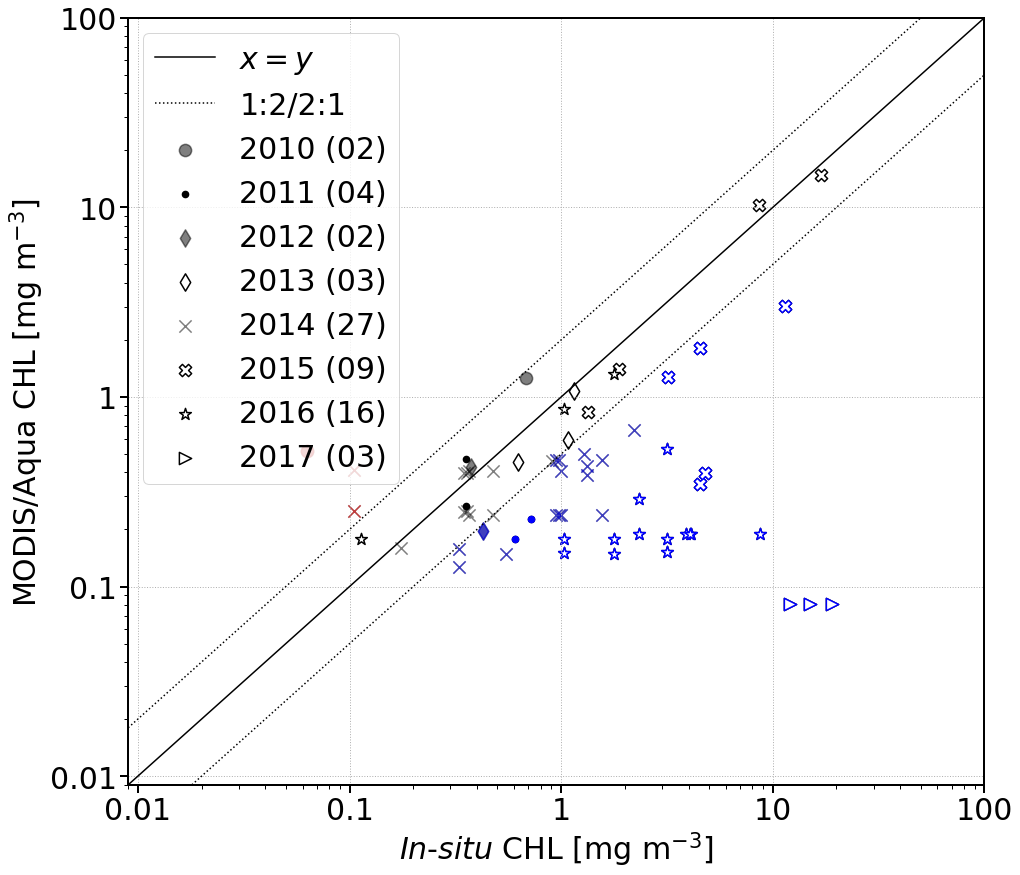

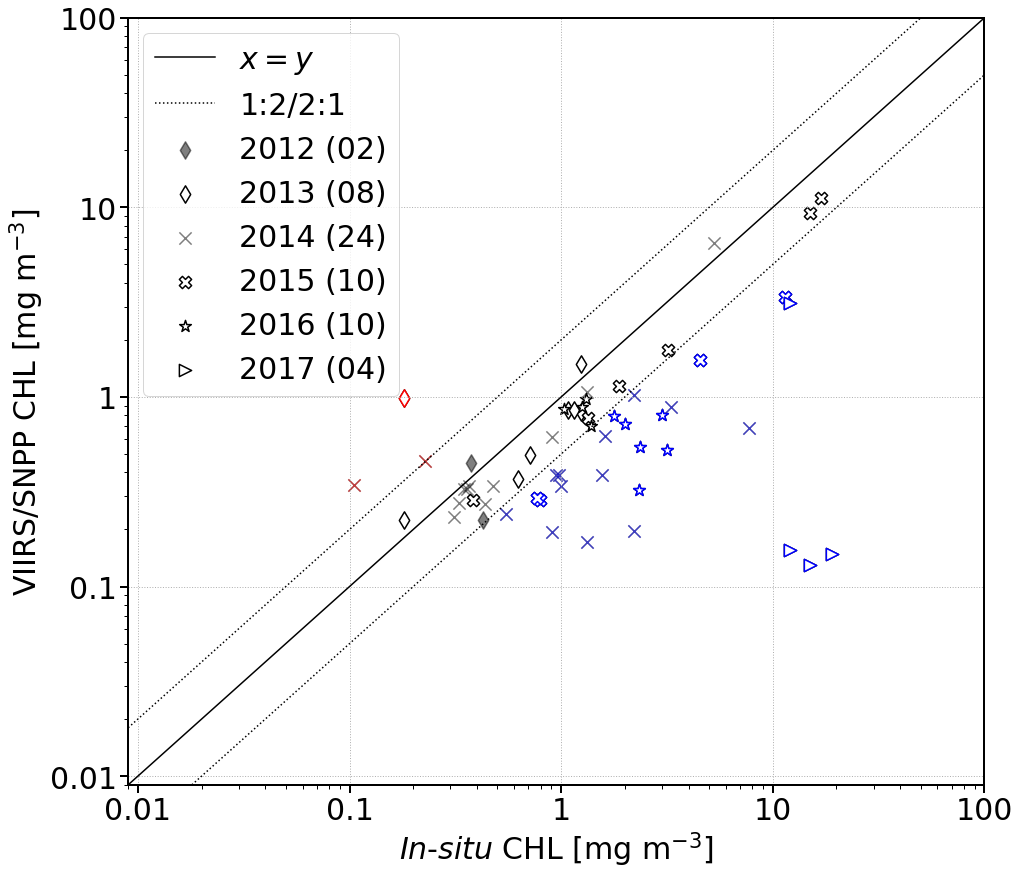

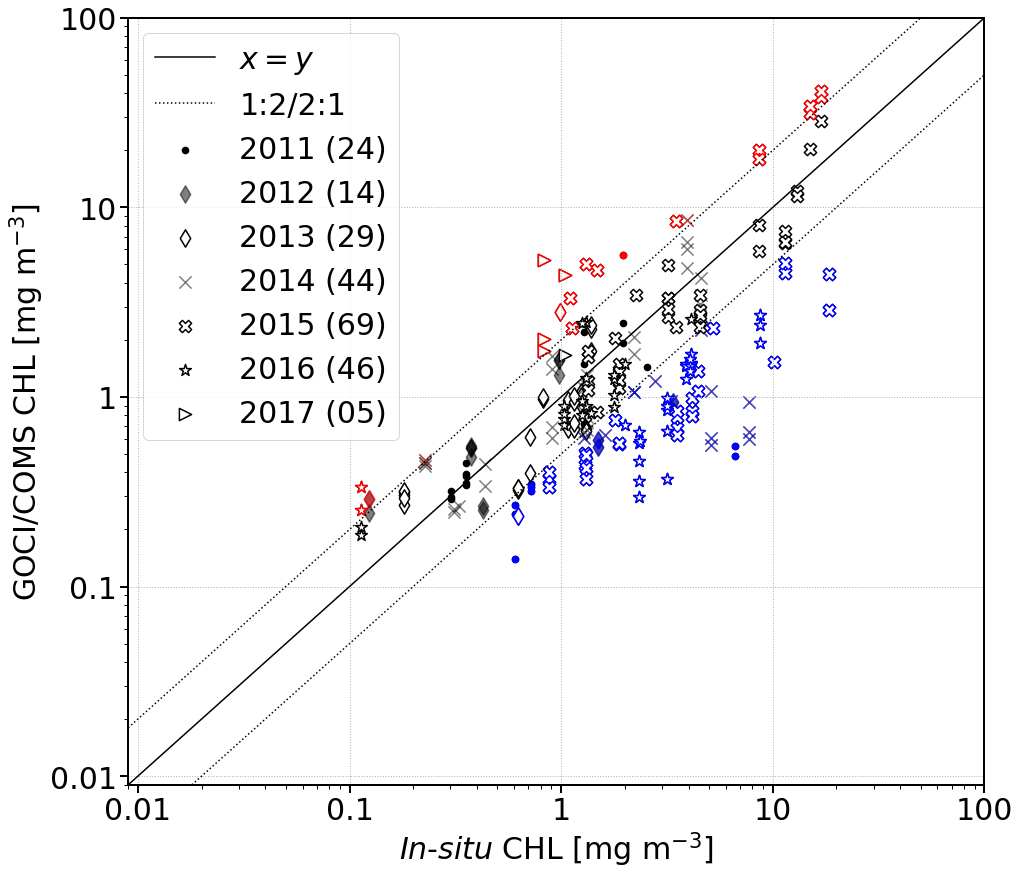

In [7]:
fig_path = PATH.joinpath('Figures')
if not fig_path.is_dir():
    fig_path.mkdir()
russia_var = ['chla', var_select, 'Filename']
japan_var = ['chla_0', 'chla_02', var_select, 'Filename']

for sen, name in sens.items(): 
    print(sen)
    if sen == 'SGLI':
        continue
        
    for key, val in markers.items():
        # print(f'{key}')
        for file in PATH.glob(f'{key.lower()}*.{sen}.OC.matchup.csv'):
            print(f'\t{file}')
            if key != 'Japan':
                continue

            var_field = 'CHLA [mg m^-3]' if key == 'SGLI' else 'chlor_a [mg m^-3]'
            var = japan_var if 'japan' in file.name else russia_var
            xvar = 'chla_02' if 'japan' in file.name else 'chla'
            
            
            print(f'\n{file.name}: {var_field}')

            df = pd.read_csv(file, skiprows=14)

            df.mask(df.isin([-999, '-999', 'n.d.']), inplace=True)

            idx = df[field].isin([var_field])
            subset = df.loc[idx, index + var]
            subset.reset_index(inplace=True)
            subset['Year'] = pd.DatetimeIndex(subset['Date']).strftime('%Y')
            subset.set_index(index, inplace=True)

            print(f'{subset.shape}')
            if subset.shape[0] == 0:
                continue

            xx, yy, ax = get_plot(df=subset
                                  , sen=name
                                  , w=14
                                  , h=12
                                  , xvar=xvar
                                  , mk=key
                                  , lw=0.5)

            plt.savefig(fig_path.joinpath(file.name.replace('.csv', '.png')), dpi=200)
            plt.savefig(fig_path.joinpath(file.name.replace('.csv', '.pdf')), dpi=200)

In [8]:
# path = Path(r'C:\Users\Eligio\Documents\NPEC\Python\Validation\NEAT')
# for y in [2016, 2018]:
#     f = path.joinpath(f'GOCI_COMS_{y}.csv').absolute()
#     print(f.is_file())
#     cmd = f"python pyget.py --sat=goci --data_type=OC --text_file={f} " \
#           f" --max_time_diff=1 --output_dir={path.joinpath('Data')}"
#     #     subprocess.check_call(cmd, shell=True)
#     print(f'{cmd}')

# Author
E.R. Maure